# Distribution Fitting (Univariate)

Much material from: https://pythonhealthcare.org/2018/05/03/81-distribution-fitting-to-data/

2021-02-12 - Jeff Smith

In [1]:
import pandas as pd
import numpy as np
import scipy
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("../data/st.csv")
df.head()

,Obs
0,1.020620
1,0.993578
2,1.046749
3,1.007924
4,1.160732


In [3]:
df.Obs.describe()

count    579.000000
mean       0.986687
std        0.099470
min        0.756958
25%        0.919458
50%        0.980349
75%        1.058358
max        1.229443
Name: Obs, dtype: float64

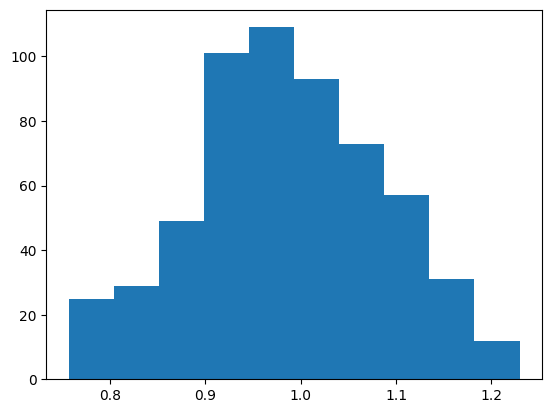

In [4]:
obs = df.Obs.to_numpy()
plt.hist(obs);

In [18]:
# Set list of distributions to test
# See https://docs.scipy.org/doc/scipy/reference/stats.html for more
dist_names = ['expon', 'gamma', 'lognorm', 'norm', 'triang', 'uniform']


## Triangular (Continuous)

In [22]:
dist_name = 'triang'
dist = getattr(scipy.stats, dist_name)
param = dist.fit(obs)
param
# param = [shape, location, scale]

(0.5087470316451992, 30.010425287007777, 19.944246341613177)

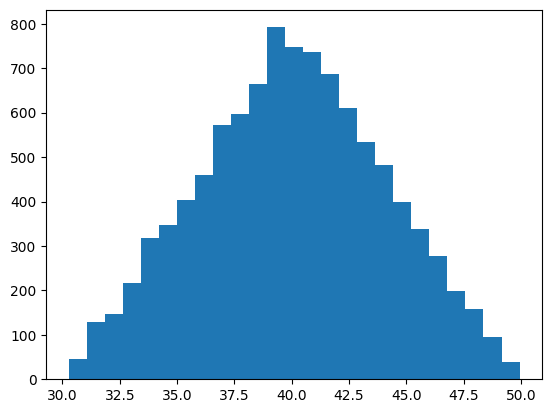

In [23]:
# generate some observations from the fit
plt.hist(dist.rvs(param[0], param[1], param[2], size=10000), bins=25);

In [24]:
# If we want the min, most likely, max (a, b, c) parameters
a = param[1]
b = param[1] + param[0]*param[2]
c = param[1] + param[2]
a, b, c

(30.010425287007777, 40.1570014117041, 49.95467162862096)

In [ ]:
# if we want to go backwards from a, b, c (we could use
# this to generate observations from a triangular dist with
# the given abc values).

# For Example
a = 127.25
b = 224.1
c = 240.67

loc = a
scale = c-a
shape = (b-a)/(c-a)
plt.hist(dist.rvs(shape, loc, scale, size=10000), bins=25);

## Lognormal

Some help at https://stackoverflow.com/questions/18534562/scipy-lognormal-fitting and https://code-examples.net/en/q/857af1

In [5]:
dist_name = 'lognorm'
dist = getattr(scipy.stats, dist_name)
param = dist.fit(obs)
param
# param = [shape, location, scale]

(3.1608904316575134e-05, -131041.66350989982, 131081.7318726056)

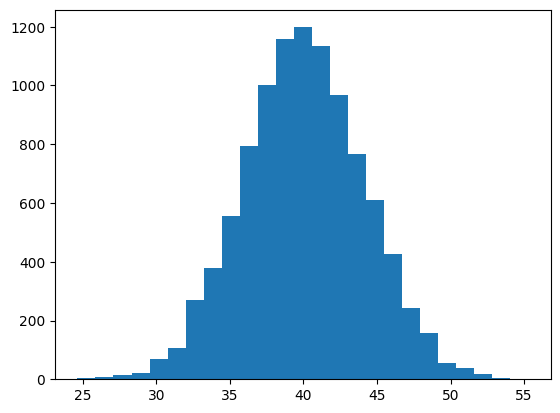

In [6]:
# generate some observations from the fit
plt.hist(dist.rvs(param[0], param[1], param[2], size=10000), bins=25);

Y: (3.299, 0.278); X: (1.1901, 0.0841)


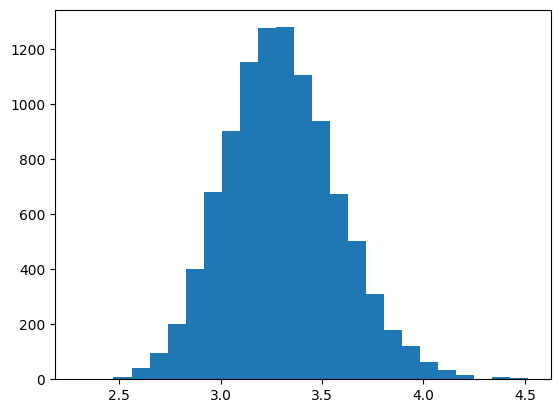

In [7]:
# shape - sigma_x
# loc - shift
# scale - exp(mu_x)

# Example:
mu_y    = 3.299
sigma_y = 0.278
mu_x = np.log(np.square(mu_y)/np.sqrt(np.square(mu_y) + np.square(sigma_y)))
sigma_x = np.sqrt(np.log(np.square(sigma_y)/np.square(mu_y) + 1))
print("Y: ({:}, {:}); X: ({:.4f}, {:.4f})".format(mu_y, sigma_y, mu_x, sigma_x))

# Sampling
plt.hist(dist.rvs(sigma_x, 0, np.exp(mu_x), size=10000), bins=25);

## Normal

In [8]:
dist_name = 'norm'
dist = getattr(scipy.stats, dist_name)
param = dist.fit(obs)
param
# param = [location, scale]

(40.068428189161075, 4.143349151009951)

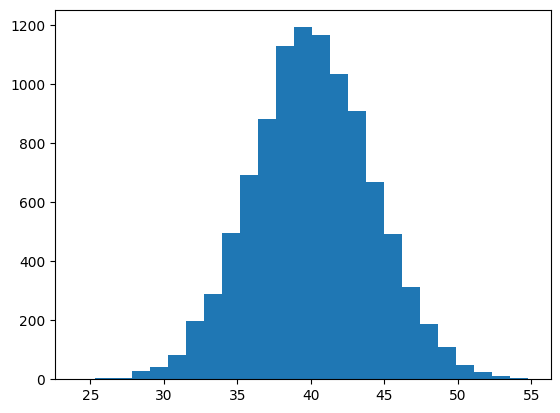

In [9]:
# generate some observations from the fit
plt.hist(dist.rvs(param[0], param[1], size=10000), bins=25);

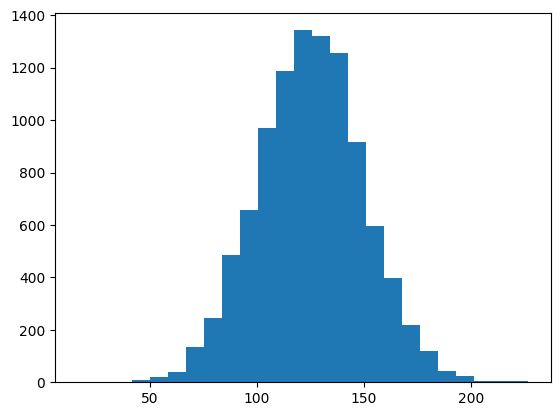

In [10]:
# Generating with a given mu and sigma
mu = 125
sigma = 25
plt.hist(dist.rvs(mu, sigma, size=10000), bins=25);